In [89]:
import yfinance as yf

In [90]:
sp500 = yf.Ticker("^GSPC")

In [91]:
sp500 = sp500.history(period='max')

In [92]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,0.0,0.0
2024-04-30 00:00:00-04:00,5103.779785,5110.830078,5035.310059,5035.689941,4082470000,0.0,0.0
2024-05-01 00:00:00-04:00,5029.029785,5096.120117,5013.450195,5018.390137,4544170000,0.0,0.0


In [93]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-04-22 00:00:00-04:00', '2024-04-23 00:00:00-04:00',
               '2024-04-24 00:00:00-04:00', '2024-04-25 00:00:00-04:00',
               '2024-04-26 00:00:00-04:00', '2024-04-29 00:00:00-04:00',
               '2024-04-30 00:00:00-04:00', '2024-05-01 00:00:00-04:00',
               '2024-05-02 00:00:00-04:00', '2024-05-03 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24201, freq=None)

<Axes: xlabel='Date'>

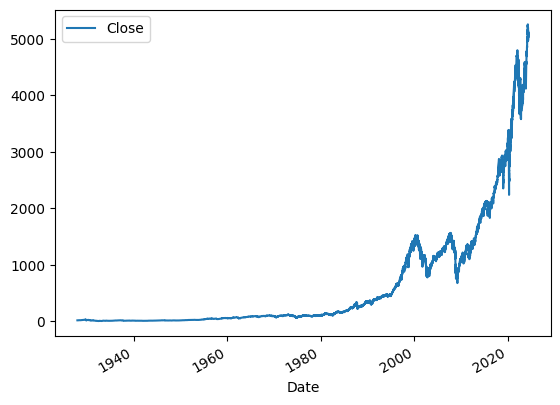

In [94]:
#Grafica de como ha cerrado el precio del mercado a lo largo del tiempo
sp500.plot.line(y="Close", use_index=True)

In [95]:
#Vamos a remover las columnas que no necesitamos
del sp500["Dividends"]
del sp500["Stock Splits"]

# Set up our target

Lo que queremos saber es si el precio subirá o bajará mañana

In [96]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [97]:
# La nueva columna contendrá los valores de cierre de la bolsa de valores desplazados una fila hacia arriba,
# es decir, los valores de cierre de la bolsa de valores del día siguiente.
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,5035.689941
2024-04-30 00:00:00-04:00,5103.779785,5110.830078,5035.310059,5035.689941,4082470000,5018.390137
2024-05-01 00:00:00-04:00,5029.029785,5096.120117,5013.450195,5018.390137,4544170000,5064.200195


In [98]:
# Definimos nuestro objetivo y lo vamos a poner como una columna booleana
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [99]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,5035.689941,0
2024-04-30 00:00:00-04:00,5103.779785,5110.830078,5035.310059,5035.689941,4082470000,5018.390137,0
2024-05-01 00:00:00-04:00,5029.029785,5096.120117,5013.450195,5018.390137,4544170000,5064.200195,1


In [100]:
# Vamos a coger solo los datos desde 1990
sp500 = sp500.loc["1990-01-01":].copy()

In [101]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,5035.689941,0
2024-04-30 00:00:00-04:00,5103.779785,5110.830078,5035.310059,5035.689941,4082470000,5018.390137,0
2024-05-01 00:00:00-04:00,5029.029785,5096.120117,5013.450195,5018.390137,4544170000,5064.200195,1


# Training an intial machine learning model

In [102]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
#este código crea un clasificador de bosque aleatorio con 100 árboles, donde cada árbol requiere 
# al menos 100 muestras para dividir un nodo interno, y los resultados serán reproducibles 
# utilizando una semilla aleatoria específica (1).

train = sp500.iloc[:-300]
# Coje todos los datos menos los 100 ultimos
# El motivo de dejar una porción de datos como conjunto de prueba es verificar 
# cómo se desempeña el modelo en datos que no ha visto durante el entrenamiento. 

test = sp500.iloc[-300:]
# vamos a hacer el test con los utlimos 100 datos

predictors = ["Close", "Volume", "Open", "High", "Low"]
# estos son los parametros que vamos a utilizar para hacer las predicciones, 
# no utilizamos "Tomorrow" porque en la vida real no sabemos el precio del dia siguiente    

model.fit(train[predictors], train["Target"])
# va a entrenar el modelo usando las columnas que estan en predictors, con el ogjetivo de predecir el "Target"

RandomForestClassifier(min_samples_split=100, random_state=1)

Usamos ramdom Forest porque:
1. Tabaja entrenandose cantidad de decisiones de arbol con parametros aleatorios
2. Tiene tendencia al overfit**
3. Corre relativamente rapido
4. Puede trabajar con tendencias no lineales 

In [103]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

Cuando haces pred = model.predict(test[predictors]), estás utilizando tu modelo entrenado (model) para hacer predicciones sobre un conjunto de datos de prueba (test) utilizando las características especificadas en predictors. Estas predicciones se almacenan en la variable pred.

Luego, puedes utilizar la función precision_score para calcular la precisión del modelo comparando estas predicciones (pred) con las etiquetas reales de los datos de prueba. La precisión es una métrica que mide la proporción de predicciones correctas sobre el total de predicciones realizadas.


In [104]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [105]:
precision_score(test["Target"], preds)

0.549618320610687

In [106]:
# Para ver graficamente como se comportan las predicciones
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

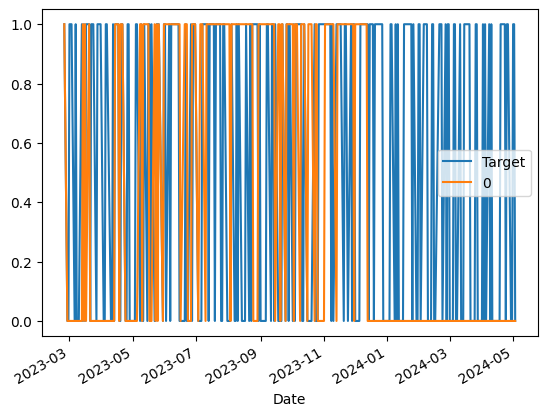

In [107]:
combined.plot()

# Building a backtesting system

In [108]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [109]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [110]:
predictions = backtest(sp500, model, predictors)

In [111]:
predictions["Predictions"].value_counts()

Predictions
0    3555
1    2596
Name: count, dtype: int64

In [114]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [115]:
# esto no esta tan bueno, no nos dice nada diferente a lo que podemos calcular a mano
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.534385
0    0.465615
Name: count, dtype: float64

# Adding additional predictiors to our model

In [116]:
# Vamos a probar con los ultimos 2, 5, 60, 250 y 1000 dias
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_{horizon}'
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    #Nuevas caracteristicas para hacer las predicciones
    new_predictors += [ratio_column, trend_column]


In [119]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922,1,1.005079,1.0,1.007851,4.0,1.000078,31.0,1.107254,136.0,1.232267,531.0
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,5035.689941,0,1.001587,2.0,1.006853,4.0,1.002569,31.0,1.109859,137.0,1.235516,531.0
2024-04-30 00:00:00-04:00,5103.779785,5110.830078,5035.310059,5035.689941,4082470000,5018.390137,0,0.992072,1.0,0.992377,3.0,0.986550,30.0,1.091533,137.0,1.215463,530.0


# Improving our model

In [120]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [121]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] #Probabilidad de que el precio suba
    preds[preds>=0.6] = 1
    preds[preds<0.6] = 0
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [122]:
predictions = backtest(sp500, model, new_predictors)

In [123]:
predictions["Predictions"].value_counts()

Predictions
0.0    4316
1.0     834
Name: count, dtype: int64

In [125]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5731414868105515